<a href="https://colab.research.google.com/github/somak135/Computational-Finance-assignment/blob/main/compfin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def bottom_boundary_condition(K,T,S_min, r, t):
    return np.zeros(t.shape)
def top_boundary_condition(K,T,S_max, r, tau):
    return S_max-np.exp(-r*(tau))*K
def final_boundary_condition(K,T,S):
    return np.maximum(S-K,0)

In [2]:
def compute_abc( K, T, sigma, r, S, dtau, dS ):
  a = (-sigma**2 * S**2/(2* dS**2 ) + r*S/(2*dS))*(dtau)
  b = 1+(r + sigma**2 * S**2/(dS**2))*(dtau)
  c = (-sigma**2 * S**2/(2* dS**2 ) - r*S/(2*dS))*(dtau)
  return a,b,c
def compute_lambda( a,b,c ):
  return scipy.sparse.diags( [a[1:],b,c[:-1]],offsets=[-1,0,1])
def compute_W(a,b,c, V0, VM):
  M = len(b)+1
  W = np.zeros(M-1)
  W[0] = -a[0]*V0
  W[-1] = -c[-1]*VM
  return W

In [3]:
def price_call_explicit( K, T, r, sigma, S_min, S_max, dtau, dS):
  N = int(T/dtau)
  M =int((S_max-S_min)/dS)
  S = np.linspace(S_min,S_max,M+1)
  tau = np.linspace(0,T,N+1)
  t = np.linspace(T,0,N+1)
  V = np.zeros((N+1,M+1))
  V[:,-1] = top_boundary_condition(K,T,S_max,r,tau)
  V[:,0] = bottom_boundary_condition(K,T,S_max,r,tau)
  V[0,:] = final_boundary_condition(K,T,S)
  a,b,c = compute_abc(K,T,sigma,r,S[1:-1],dtau,dS)
  Lambda =compute_lambda( a,b,c).toarray()
  Ainv=np.linalg.inv(Lambda)
  for i in range(N):
    W = compute_W(a,b,c,V[i,0],V[i,M])
    V[i+1,1:M]=np.matmul(Ainv,(V[i,1:M]+W))
  return V, t, S

**Example 1**

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0, 'V')

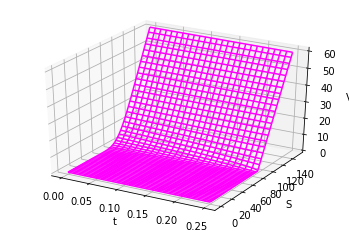

In [4]:
V,t,S=price_call_explicit( K=90, T=.25, r=0.0375, sigma=0.3,S_min=0, S_max=150,dtau=(0.25/50),dS=1/100)
t, S = np.meshgrid(t, S)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(t.T, S.T, V, color='blue')
ax.set_xlabel('t')
ax.set_ylabel('S')
ax.set_zlabel('V')

The below cell cannot be run in Google Colab due to RAM overload. The outputs in the report was generated in ISI server.

In [ ]:
delS = np.array([1/100, 1/25, 1/10, 1])
Smin = np.array([0, 25, 50])
Smax = np.array([150, 200, 250])
flag = 0

for i in delS:
  for j in Smin:
    for k in Smax:
      flag = flag + 1
      V,t,S=price_call_explicit( K=90, T=.25, r=0.0375, sigma=0.3,S_min=j, S_max=k,dtau=(0.25/50),dS=i)
      t, S = np.meshgrid(t, S)
      fig = plt.figure()
      ax = plt.axes(projection='3d')
      ax.plot_wireframe(t.T, S.T, V, color='blue')
      ax.set_xlabel('t')
      ax.set_ylabel('S')
      ax.set_zlabel('V')

      fname = "fig {}".format(flag) + ".png"
      fig.savefig(fname = fname, dpi = 600)


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)
